In [2]:
# Install JoviSpec
# git clone https://github.com/HajimeKawahara/jovispec.git
# python setup.py install

from decimal import Decimal
from jovispec import abcio
import pkg_resources


jupiter_data = pkg_resources.resource_filename("jovispec", "jupiter_data")

#red 
#rlambc, rspecc, rheadc=abcio.read_qfits("06033",jupiter_data,ext="q")
#rlambw, rspecw, rheadw=abcio.read_qfits("06047",jupiter_data,ext="q")
#rlambe, rspece, rheade=abcio.read_qfits("06049",jupiter_data,ext="q")

#blue
#rlambc, rspecc, rheadc=abcio.read_qfits("06034",jupiter_data,ext="q")
rlambw, rspecw, rheadw=abcio.read_qfits("06048",jupiter_data,ext="q")
rlambe, rspece, rheade=abcio.read_qfits("06050",jupiter_data,ext="q")

In [3]:
wavelength_start = 7100.0 #AA
wavlength_end = 7450.0 #AA

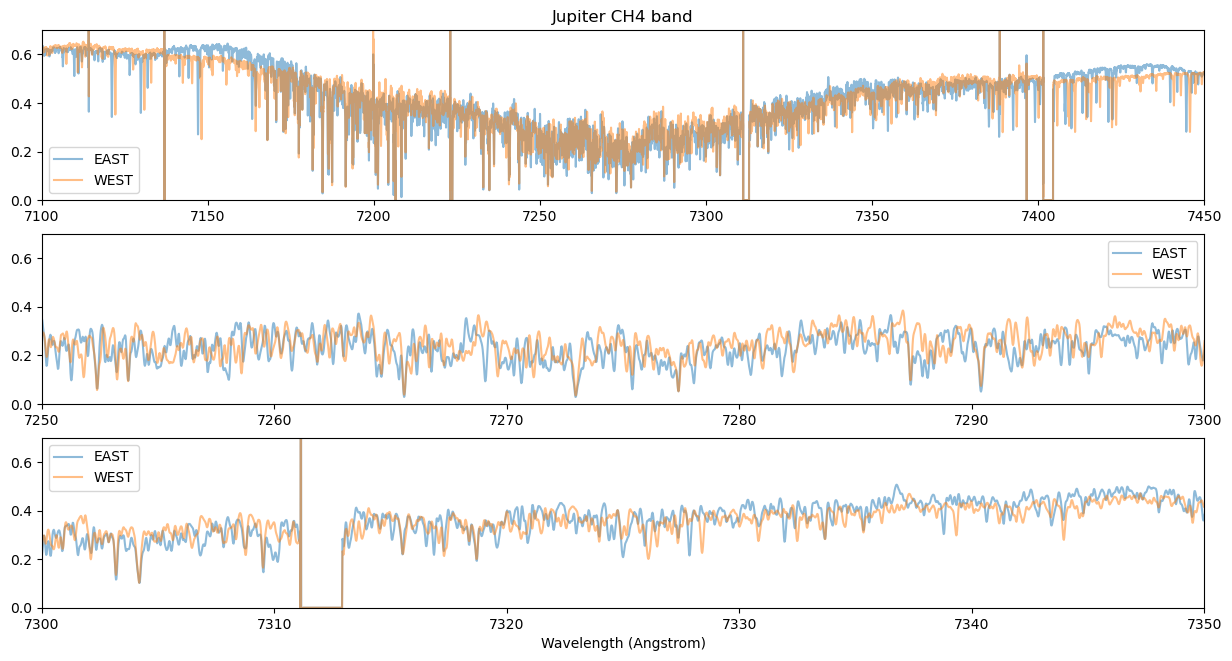

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,7.5))
ax = fig.add_subplot(311)
plt.plot(rlambe,rspece,alpha=0.5,label="EAST")
plt.plot(rlambw,rspecw*0.7,alpha=0.5,label="WEST")
plt.ylim(0.0,0.7)
plt.xlim(wavelength_start,wavlength_end)
plt.legend()
plt.title("Jupiter CH4 band")

#plt.xlim(7150.0,7200.0)
ax = fig.add_subplot(312)
plt.plot(rlambe,rspece,alpha=0.5,label="EAST")
plt.plot(rlambw,rspecw*0.7,alpha=0.5,label="WEST")
plt.legend()
plt.ylim(0.0,0.7)
plt.xlim(7250.0,7300.0)
ax = fig.add_subplot(313)
plt.plot(rlambe,rspece,alpha=0.5,label="EAST")
plt.plot(rlambw,rspecw*0.7,alpha=0.5,label="WEST")
plt.legend()
plt.ylim(0.0,0.7)
plt.xlim(7300.0,7350.0)
plt.xlabel("Wavelength (Angstrom)")

plt.savefig("ch4jupiter.png")

In [10]:
from exojax.utils.grids import wavenumber_grid
Nnus = 40000
nus, wav, res = wavenumber_grid(wavelength_start, wavlength_end, Nnus, xsmode="premodit", unit="AA")

from exojax.spec.atmrt import ArtReflectPure
artr = ArtReflectPure(nu_grid=nus, pressure_btm=1.e2, pressure_top=1.e-5, nlayer=100)


xsmode =  premodit
xsmode assumes ESLOG in wavenumber space: mode=premodit
We changed the policy of the order of wavenumber/wavelength grids
wavenumber grid should be in ascending order and now 
users can specify the order of the wavelength grid by themselves.
Your wavelength grid is in ***  descending  *** order
This might causes the bug if you update ExoJAX. 
Note that the older ExoJAX assumes ascending order as wavelength grid.
